# References

* [CS231n: Convolutional Neural Networks for Visual Recognition 2017](http://cs231n.stanford.edu/2017/syllabus)
    - [cs231n 2017 assignment #1 kNN, SVM, SoftMax, two-layer network](https://cs231n.github.io/assignments2017/assignment1/)
    - [Training a Softmax Linear Classifier](https://cs231n.github.io/neural-networks-case-study)
* [ゼロから作る Deep Learning](https://github.com/oreilly-japan/deep-learning-from-scratch)
* [Mathematics for Machine Learning](https://mml-book.github.io/)

# Neural network 
Simple one layer neural network classifier. Mathjax formula not fully supported in github, hence the formulas get corrupted.

<img src="image/nn_diagram.png" align="left">

<img src="image/nn_functions.png" align="left">

# Setup

In [1]:
from typing import (
    Optional,
    Union,
    List,
    Dict,
    Tuple
)

## Python path
Python path setup to avoid the relative imports.

In [2]:
import sys
import os 

## Package dependencies

In [3]:
from typing import (
    Union,
    List,
    Callable
)
import inspect
from functools import partial
import logging
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(linewidth=80) 

## Jupyter notebook

In [4]:
#!conda install line_profile memory_profiler
%load_ext memory_profiler
%load_ext line_profiler

# %matplotlib notebook
%matplotlib inline

## Network geometry

In [5]:
N = 1    # Batch size
D = 3    # Number of features in the input data
M = 2    # Number of nodes in a layer

---

# Confiurations 

## X
X is to have been standardized. 

## T
Labels for data X.

### For One Hot Encoding labels
$
\begin{align*}
\overset{ (N,M) }{ T_{_{OHE}} } &= ( 
    \overset{ (M,) }{ T_{(n=0)} }, \; \dots \;, \overset{ (M,) }{ T_{(n=N-1)} } 
) 
\\
\overset{ (N,M) }{ T_{_{OHE}} } = ( 
    \overset{ (M,) }{ T_{(n=0)} }, \dots , \overset{ (M,) }{ T_{(n=N-1)} } 
) 
\\
\overset{ (M,) }{ T_{ _{OHE} (n)} } &= ( \overset{ () }{ t_{(n)(m=0)} }, \; \dots \;, \overset{ () }{ t_{(n)(m=M-1)} })
\end{align*}
$

### For index labels
$
\begin{align*}
\overset{ (N,) }{ T_{_{IDX}} } &= (\overset{ () }{ t_{(n=0)} }, \; \dots \;, \overset{ () }{ t_{(n=N-1)} }) \qquad \text {for index labels }
\end{align*}
$

## W
Weight parameters.

In [6]:
from common import (
    xavier,
    he,
    uniform
)

---

# Normalization Layer
Apply normalization or use batch normaliation.

---

# Matmul layer

In [7]:
from layer.matmul import Matmul

## Objective Function
$
\begin{align*}
\overset{ (N,M) }{ Y } 
&= 
\begin{bmatrix}
{ Y_{(n=0)} } \\
\vdots \\
{ Y_{(n)} } \\
\vdots \\
{ Y_{(n=N-1)} }
\end{bmatrix}
=
\overset{ (N,D) }{ X } \; @ \; \overset{ (D,M) }{ W^T }
\\
\\
\overset{ (M,) }{ Y_{(n)} } &= (y_{(n)(m=0)}, \; \dots, \; y_{(n)(m)},  \; \dots, \; y_{(n)(m=M-1)})
\\
\overset{ () }{ y_{(n)(m)} }
&= \overset{ (D,) }{ X_{(n)} } \cdot \overset{ (D,) }{ W_{(m)}^T }
= \sum\limits ^{D}_{d=0}  \overset{ () }{ x_{(n)(d)} } * \overset{ () }{ w_{(m)(d)} }
\\
_{(0 \le d \le D, \; 0 \le n \lt N, \; 0 \le m \lt M)}
\end{align*}
$

## Gradient dL/dX

Impact on L by $dX$.

$
\begin{align*}
\overset { (N,D) }{ \frac {\partial L }{ \partial X } }
= \overset { (N,M) }{ \frac {\partial L}{\partial Y} }
@ \overset { (M,D) }{ W } 
\end{align*}
$
<img src="image/nn_back_propagation_dL_dX.png" align="left" />

## Gradient dL/dW.T
Impact on L by $dW^T$.

$
\begin{align*}
\overset { (N,M) }{ \frac {\partial L }{ \partial W^T } }
= \overset { (D,N) }{ X^T } 
@ 
\overset { (N,M) }{ \frac {\partial L}{\partial Y} }
\end{align*}
$

<img src="image/nn_back_propagation_dL_dWT.png" align="left" />

---

# Activation layer

## Objective function
$
\begin{align*}
\overset{ (N,M) }{ A } &= 
activation \left( 
    \overset{ (N,M) }{ Y }  = 
    \begin{bmatrix}
    { Y_{(n=0)} } \\
    \vdots \\
    { Y_{(n)} } \\
    \vdots \\
    { Y_{(n=N-1)} }
    \end{bmatrix}
\right)
\\
\overset{ (M,) }{ A_{(n)} } 
&= activation \left( \overset{ (M,) }{ Y_{(n) }} \right)  \\
&= (a_{(n)(m=0)}, \; \dots, \; a_{(n)(m)},  \; \dots, \; a_{(n)(m=M-1)})
\\
\overset{ () }{ a_{(n)(m)} } &= activation \left( \overset{ () }{ y_{(n)(m)} } \right)
\quad _{(0 \le n \lt N, \; 0 \le m \lt M)}
\end{align*}
$

## Gradient dL/dY

Impact on L by dY from the matmul layer.

$
\begin {align*}
\overset { (N,M) }{ \frac {\partial L }{ \partial Y } }
= \overset { (N,M) }{ \frac {\partial L}{\partial A} } 
* 
\overset { (N,M) }{ \frac {\partial A}{\partial Y} }
\end {align*}
$

### For sigmoid activation

$
\begin{align*}
\overset {(N,M)}{\frac { \partial L }{ \partial Y} }
&= \frac { \partial A }{ \partial Y} * A * (1 - A)
\\
\frac { \partial y_{(n)(m)} } { \partial a_{(n)(m)} }
&= a_{(n)(m)} * (1 - a_{(n)(m)} )  \\ 
y_{(n)(m)} = sigmoid(a_{(n)(m)} )&=  \frac {1}{ 1 + exp(y_{(n)(m)})}
\end{align*}
$

### For ReLU activation

$
\begin{align*}
\frac { \partial a_{(n)(m)} }{ \partial y_{(n)(m)} }
&= 1 \quad y_{(n)(m)}  \gt 0 \\
&= 0 \quad y_{(n)(m)}  \le 0 \\
\end{align*}
$

---

# Softmax layer
$C_n$ is to prevent the overflow at $np.exp()$.

<img src="image/softmax.png" align="left" width=400/>

exp(x) can take all x values and produces a positive, which is required for log(y) that needs y > 0, hence fit-for-purpose to build a probability function.

<img src="image/exp.gif" align="left" width=250/>

Softmax and Cross Entropy Log Loss are combined as the gradient results in a simple form $P - T$.

In [8]:
from layer import CrossEntropyLogLoss
from common import softmax

lines = inspect.getsource(softmax)
print(lines)

def softmax(X: Union[np.ndarray, float]) -> Union[np.ndarray, float]:
    """Softmax P = exp(X) / sum(exp(X))
    Args:
        X: batch input data of shape (N,M).
            N: Batch size
            M: Number of nodes
    Returns:
        P: Probability of shape (N,M)
    """
    name = "softmax"
    assert isinstance(X, float) or (isinstance(X, np.ndarray) and X.dtype == float), \
        "X must be float or ndarray(dtype=float)"

    # --------------------------------------------------------------------------------
    # exp(x-c) to prevent the infinite exp(x) for a large value x, with c = max(x).
    # keepdims=True to be able to broadcast.
    # --------------------------------------------------------------------------------
    C = np.max(X, axis=-1, keepdims=True)
    exp = np.exp(X - C)
    P = exp / np.sum(exp, axis=-1, keepdims=True)
    Logger.debug("%s: X %s exp %s P %s" % (name, X, exp, P))

    return P



## Objective function
$
\begin{align*}
\overset{ (N,1) }{ C } &= np.max\left( 
    \overset{ (N,M) }{ A }, \; axis=-1,  \; keepdim=True 
\right) \\
&=  
\begin{bmatrix}
    \begin{bmatrix} \overset{ () }{ c_{(n=0  )} } \end{bmatrix} \\
    \begin{bmatrix} \overset{ () }{ c_{(n    )} } \end{bmatrix} \\
    \begin{bmatrix} \overset{ () }{ c_{(n=N-1)} } \end{bmatrix}
\end{bmatrix} 
\\
\overset{ (N,M) }{ EXP } &= np.exp \left( \overset{ (N,M) }{ A } - \overset{ (N,1) }{ C } \right)
= np.exp \left(
    \begin{bmatrix}
    { A_{(n=0)} } - { C_{(n=0)} }\\
    \vdots \\
    { A_{(n)} }   - { C_{(n)} }\\
    \vdots \\
    { A_{(n=N-1)} } - { C_{(n=N-1)} }\\
    \end{bmatrix}
\right) 
\\
&= 
\begin{bmatrix}
    e_{(n=0)(m=0)}   & \dots      & e_{(n=0)(m=M-1)}   \\  
    \vdots           & e_{(n)(m)} & \vdots             \\
    e_{(n=N-1)(m=0)} & \dots      & e_{(n=N-1)(m=M-1)} 
\end{bmatrix} 
\\
\\
\overset{ (N,1) }{ S } &= \overset{ (N,1) }{ sum(EXP) } = np.sum \left( 
    \overset{ (N,M) }{ EXP }, \; axis=-1,  \; keepdim=True 
\right)
\\
&= 
\begin{bmatrix}
    \begin{bmatrix} \overset{ () }{ s_{(n=0  )} } \end{bmatrix} \\
    \begin{bmatrix} \overset{ () }{ s_{(n    )} } \end{bmatrix} \\
    \begin{bmatrix} \overset{ () }{ s_{(n=N-1)} } \end{bmatrix}
\end{bmatrix} 
\\
\overset{ () }{ s_{(n)} } &= \sum\limits ^{M-1}_{m=0} np.exp(\; a_{(n)(m)} - c_{(n)} \; )
\\
\\
\overset{ (N,M) }{ P } &= \overset{ (N,M) }{ EXP }  \;\; / \;\; \overset{ (N,1) }{ sum(EXP) } 
\\
\overset{ (N,) }{ P_{(n)} } &= (p_{(n)(m=0)}, \; \dots, \; p_{(n)(m)} , \; \dots, \; p_{(n)(m=M-1)})
\\
{ p_{(n)(m)} } 
&= \frac {np.exp \left( 
    { a_{(n)(m) } } - { c_{(n)} }) \right) 
}
{  
np.sum \left( 
    np.exp \left( 
        a_{(n)(m) } - c_{(n)}
    \right)
\right) 
}
\end{align*}
$

## Gradient dL/dA

Impact on L by dA from the activation layer.

$
\begin{align*}
\overset { (N,M) }{ \frac {\partial L }{\partial A} }
= \overset { (N,M) }{ \frac {\partial L}{\partial P} }
* 
\overset { (N,M) }{ \frac {\partial P }{\partial A} } 
= 
\frac {1}{N} (P - T)
\end{align*}
$

$
Jacobian \; : \; f \circ g \rightarrow Jf \circ Jg
\\
\begin{align*}
\\
L &= f(\; p_{(n)(m=0)} \;) = f( \; g(\;  a_{(n)(m=0)} \; ) \; ) \quad : p = g(a) = softmax(a)
\\
\frac {\partial L} { \partial a_{(n)(m=0)} }
&= Jf(p) \circ Jg(a) 
=  \frac {\partial L} { \partial p_{(n)(m=0)} } * \frac {\partial  p_{(n)(m=0)}} { \partial a_{(n)(m=0)} }
\\
&= \frac {1}{N} \left(
 p_{(n)(m=0)} -t_{(n)(m=0)}
\right)
\end{align*}
$

### Gradient from cross entropy log loss

$
\begin{align*}
\frac { \partial L }{ \partial  p_{(n)(m=0)} }
&= \frac{-1}{N} t_{(n)(m=0)} * \frac {s_{(n)}}{e_{(n)(m=0)}}
\\
\frac { \partial L }{ \partial  p_{(n)(m=1)} } 
&= \frac{-1}{N} t_{(n)(m=1)} * \frac {s_{(n)}}{e_{(n)(m=1)}}
\end{align*}
$


###  Gradient $\frac { \partial  L } { \partial s^{-1}_{(n)} } $

$
\begin{align*}
p_{(n)(m=0)} &= \frac {e_{(n)(m=0)} }{ s_{(n)} } \\
p_{(n)(m=0)} &= f \circ g_{(m=0)} = { s^{-1}_{(n)} } \; * \; { e_{(n)(m=0)} }
\rightarrow \frac { \partial  p_{(n)(m=0)} } { \partial s^{-1}_{(n)} } = e_{(n)(m=0)}
\\
p_{(n)(m=1)} &= \frac {e_{(n)(m=1)} }{ s_{(n)} } \\
p_{(n)(m=1)} &= f \circ g_{(m=1)} = { s^{-1}_{(n)} } \; * \; { e_{(n)(m=1)} }
\rightarrow \frac { \partial  p_{(n)(m=1)} } { \partial s^{-1}_{(n)} } = e_{(n)(m=1)}
\\
\frac { \partial  L } { \partial s^{-1}_{(n)} } 
&=
\left[
    \frac { \partial  p_{(n)(m=0)} } { \partial s^{-1}_{(n)} } * 
    \frac { \partial L }{ \partial  p_{(n)(m=0)} } 
    +
    \frac { \partial  p_{(n)(m=1)} } { \partial s^{-1}_{(n)} } * 
    \frac { \partial L }{ \partial  p_{(n)(m=1)} } 
\right]
\\
&= \sum\limits^{M-1}_{m=0} 
    e_{(n)(m)}  * \frac { \partial L }{ \partial  p_{(n)(m)} } 
\\
\\
\frac { \partial  L } { \partial s^{-1}_{(n)} } 
&=
    \begin{bmatrix}
    e_{(n)(m=0)}  * \frac { \partial L }{ \partial  p_{(n)(m=0)} } \\
    + \\
    e_{(n)(m=1)}  * \frac { \partial L }{ \partial  p_{(n)(m=1)} } 
    \end{bmatrix}
\\
&= -s_{(n)}(\; t_{(n)(m=0)} + t_{(n)(m=1)} \;) \\
&= -s_{(n)}
\\
\frac { \partial  L } { \partial s^{-1}_{(n)} } 
&=
\left[
    e_{(n)(m=0)}  * \frac { \partial L }{ \partial  p_{(n)(m=0)} } 
    + 
    e_{(n)(m=1)}  * \frac { \partial L }{ \partial  p_{(n)(m=1)} } 
\right]
\end{align*}
$

### Gradient $\frac {\partial L }{ \partial { s_{(n)} } } $

$
\begin{align*}
\frac {1} { s_{(n)} } &= s^{-1}_{(n)} \rightarrow
\frac { \partial { s^{-1}_{(n)} } } {\partial s_{(n)}} = \frac {-1}{s^{2}_{(n)}}
\\
\frac {\partial L }{ \partial { s_{(n)} } } 
&=
\frac {-1}{s^{2}_{(n)}} * 
\frac {\partial L}{ \partial s^{-1}_{(n)} } \\
&= \frac {1}{s_n}
\end{align*} \\
$



### Gradient $\frac {\partial L}{ \partial e_{(n)(m=0)} } $
$
\begin{align*}
s_{(n)} &= \sum\limits ^{M-1}_{m=0} e_{(n)(m)} \rightarrow 
\frac { \partial { s_{(n)} } } {\partial e_{(n)(m=0)}} = 1
\\
p_{(n)(m=0)} &= \frac {e_{(n)(m=0)} }{ s_{(n)} }\rightarrow 
\frac { \partial { p_{(n)(m=0)} } } {\partial e_{(n)(m=0)}} = \frac {1}{s_{(n)}}
\\
\frac {\partial L}{ \partial e_{(n)(m=0)} } 
&= \begin{bmatrix}  
    \frac { \partial { s_{(n)} } } {\partial e_{(n)(m=0)}} *  
    \frac {\partial L }{ \partial { s_{(n)} } } \\
    + \\
    \frac { \partial { p_{(n)(m=0)} } } {\partial e_{(n)(m=0)}} * 
    \frac {\partial L }{ \partial p_{(n)(m=0)} } 
\end{bmatrix}
= \begin{bmatrix}  
    \frac {\partial L }{ \partial { s_{(n)} } } \\
    + \\
    \frac {1}{s_{(n)}} * 
    \frac {\partial L }{ \partial p_{(n)(m=0)} } 
\end{bmatrix}
\\
\frac {\partial L}{ \partial e_{(n)(m=0)} } &= 
\left[
    \frac {1}{s_{(n)}} * 
    \frac {\partial L }{ \partial p_{(n)(m=0)} } 
    + 
    \frac {\partial L }{ \partial { s_{(n)} } } 
\right]
\\
\frac {\partial L}{ \partial e_{(n)(m=0)} } &= 
\begin{bmatrix}  
    \frac {1}{s_{(n)}} * 
    \frac {\partial L }{ \partial p_{(n)(m=0)} }  \\
    +  \\
    \frac {\partial L }{ \partial s_{(n)} } 
\end{bmatrix} \\
&= \frac {-t_{(n)(m=0)}}{e_{(n)(m=0)} } + \frac {1}{s_{n}}
\end{align*}
$



### Gardient $\frac {\partial L}{ \partial a_{(n)(m=0)} } $

$
\begin{align*}
e_{(n)(m)} &= exp(\; a_{(n)(m)} \; ) \rightarrow \frac { \partial e_{(n)(m)} }{ \partial a_{(n)(m)} } = e_{(n)(m)} 
\\
e_{(n)(m=0)} &= exp(a_{(n)(m=0)}) \rightarrow \frac { \partial e_{(n)(m=0)} }{ \partial a_{(n)(m=0)} } = e_{(n)(m=0)} 
\\
e_{(n)(m=1)} &= exp(a_{(n)(m=1)}) \\
\frac {\partial L}{ \partial a_{(n)(m=0)} } 
&=   \frac { \partial e_{(n)(m=0)} }{ \partial a_{(n)(m=0)} } * 
    \frac { \partial L }{ \partial e_{(n)(m=0)} } 
= e_{(n)(m=0)} * \frac { \partial L }{ \partial e_{(n)(m=0)} } 
\\
\frac {\partial L}{ \partial a_{(n)(m=0)} } 
&= e_{(n)(m=0)} * \frac { \partial L }{ \partial e_{(n)(m=0)} } \\
&= -t_{(n)(m=0)} + \frac { e_{(n)(m=0)} }{ s_{n} } \\
&= p_{(n)(m=0)} -t_{(n)(m=0)} 
\end{align*}
$

---

# Cross Entropy Log Loss

A probability distribution $P(x)$ can be represented with its entropy $E(x) = \sum\limits_{x}  \frac {p(x)}{log(p(x)} = - \sum\limits_{x} p(x) log(p(x))$. In the diagram, x: (0:dog, 1:cat, 2:fish, 3:bird) are labels and p(dog) is 0.5. When  a NN predicts an input x as a probability distribution $P(x)$, then the $E(x) = 1.75$. 

0. $p(dog)=\frac {1}{2}$
1. $p(cat)=\frac {1}{4}$
2. $p(fish)=\frac {1}{8}$
3. $p(bird)=\frac {1}{8}$

When the truth is that x is a dog, then the probability distribution of the truth $P(t)$ has the entropy $E(t) = 0$.

0. $p(dog)=1$
1. $p(cat)=0$
2. $p(fish)=0$
3. $p(bird)=0$

The difference E(x) - E(t) = E(x) = 1.75 can be used as the distance or the error of the prediction from the truth. Need to understand further but  the actuall loss function is $E(x) = -tlog(p(x)) = -log(p(x))$ where p(x) is the probability from the softmax for the correct label.


<img src="image/entropy.png" align="left" width=600/><br>

np.log() is ln based on the mathematical constant $e$ and its derivative $\frac {\partial log(x)}{\partial x} = \frac {1}{x}$.

* [Logarithm](https://en.wikipedia.org/wiki/Logarithm)


<img src="image/logarithm_plots.png" align="left" width=300/>

* [ML Grossary - Loss Functions](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html)

<img src="image/cross_entropy_log_loss.png" align="left" width=500/>

[cross_entropy_log_loss_input_combinations.xlsx](./common/cross_entropy_log_loss_input_combinations.xlsx)

In [9]:
from common import (
    cross_entropy_log_loss,
    OFFSET_LOG
)
lines = inspect.getsource(cross_entropy_log_loss)
print(lines)

def cross_entropy_log_loss(
        P: Union[np.ndarray, float],
        T: Union[np.ndarray, int],
        f: Callable = categorical_log_loss,
        offset: float = OFFSET_LOG
) -> np.ndarray:
    """Cross entropy log loss [ -t(n)(m) * log(p(n)(m)) ] for multi labels.
    Args:
        P: activation or probabilities from an activation function.
        T: labels
        f: Cross entropy log loss function f(P, T) where P is activation, T is label
        offset: small number to avoid np.inf by log(0) by log(0+offset)

    Returns:
        J: Loss value of shape (N,), a loss value per batch.

    NOTE:
        Handle only the label whose value is True. The reason not to use non-labels to
        calculate the loss is TBD.

        See transform_X_T for the format and shape of P and T.
    """
    name = "cross_entropy_log_loss"
    P, T = transform_X_T(P, T)
    if P.ndim == 0:
        assert False, "P.ndim needs (N,M) after transform_X_T(P, T)"
        # -----------------------------

## For label using One Hot Encoding (OHE)
For instance, if multi labels are (0,1,2,3,4) and each label is OHE, then the label for 2 is (0,0,1,0,0).   


### Product of matrix rows

There is no formal operation to calculate the dot products of the rows from two matrices, but to calculate the diagonal of the matlix multiplication that also calculate non-diagonals. To avoid calculating non-diagonals, use [einsum](https://numpy.org/doc/stable/reference/generated/numpy.einsum.html).

* [Name of matrix operation of ```[A[0] dot B[0], A[1] dot B[1] ]``` from 2x2 matrices A, B](https://math.stackexchange.com/questions/4010721/name-of-matrix-operation-of-a0-dot-b0-a1-dot-b1-from-2x2-matrices-a)

<img src="image/dot_products_of_matrix_rows.png" align="left"/>


In [10]:
import numpy as np

a = np.arange(6).reshape(2,3)
b = np.arange(0,-6,-1).reshape(2,3)
c = [
    np.inner(a[0], b[0]),
    np.inner(a[1], b[1]),    
]
print(f"a is \n{a}")
print(f"b.T is \n{b.T}\n")
fmt=f"""c[
    np.inner(a[0], b[0]),
    np.inner(a[1], b[1]),    
] is {c}\n
"""
print(fmt)

# Use einsum
e = np.einsum('ij,ji->i', a, b.T)
fmt="np.einsum('ij,ji->i', a, b.T)"
print(f"{fmt} is {e}")

a is 
[[0 1 2]
 [3 4 5]]
b.T is 
[[ 0 -3]
 [-1 -4]
 [-2 -5]]

c[
    np.inner(a[0], b[0]),
    np.inner(a[1], b[1]),    
] is [-5, -50]


np.einsum('ij,ji->i', a, b.T) is [ -5 -50]


### Foward path (OHE)
$
\text{ for one hot encoding labels }
\\
\begin{align*}
\overset{ (N,) }{ J } &= - \sum\limits^{M-1}_{m=0} 
    \left[ \; \;  
        t_{(n)(m)} \;  * \;  np.log(p_{(n)(m)}) \;\;  
    \right]
\\
\overset{ () }{ j_{(n)} } &= \overset{ (M,) }{ T_{(n)} } \cdot \overset{ (M,) }{ P_{(n)} } 
\end{align*}
$

### Gradient dL/dP

Impact on L by the $dP$ from the softmax layer for one hot encoding labels.

$
\begin{align*}
\overset { (N,M) }{ \frac { \partial L }{ \partial P} }
&= \overset { (N,) }{ \frac { \partial L }{ \partial J} } * 
\overset { (N,M) }{ 
\left(
 - \frac { \partial T } { \partial P }
 \right) 
} 
= - \frac {1}{N }  \frac { \partial T } { \partial P }
\\
\frac {\partial L }{\partial p_{(n)(m=0)}} 
&= \frac {\partial L}{\partial j_{(n)}} * \frac {\partial j_{(n)}} {\partial p_{(n)(m=0)}} 
= \frac {1}{N} \frac { -t_{(n)(m=0)}}{ p_{(n)(m=0)} } 
=  \frac {1}{N} \left(
 -t_{(n)(m=0)} * \frac { s_{(n)} }{ e_{(n)(m=0)} }
\right)
\end{align*}
$

## For label using indexing 
For instance, if the multi labels are (0,1,2,3,4) then the index is 2 for the label 2. If the labels are (2,4,6,8,9), then the index is 3 for the label 8.  

Use LP to select the probabilities from P for the corresponding labels. For instance, if the label is 2 (hence the index is 2) for X(n=0), and 4 for X(n=3), then the numpy tuple indexing selects ```P[n=0][m=2]``` and ```P[n=3][m=4] ```.

```
P[
   (0, 3),
   (2, 4)
]
```

$
\text{ for index labels e.g. (5, 2, 0, 9, ...)}
\\
\\
\overset{ (N,) }{ J } = - np.sum(\; np.log(LP), \; axis = -1 \;) \\
LP = label\_probability = P \left[ \\
\quad ( \; 0, \; \dots, \;  {N-1}) , \\
\quad ( \; t_{(n=0)} \; , \dots , \; t_{(n=N-1)}) \\
\right]
\\
\\
$

---

# Total loss

## Forward path
$
\begin{align*}
\overset{ () }{ L } = \frac {1}{N} \sum\limits^{N-1}_{n=0} \overset{ () }{ j_{{(n)}} }
\end{align*}
$

## Gardient dL/dJ

Impact on L by $dJ$ from the cross entropy log loss layer.

$
\begin{align*}
\overset { (N,) }{ \frac {\partial L}{\partial J} }  &= \frac {1}{N} \overset{(N,)}{ones}
\\
\frac {\partial L}{\partial j_{(n)} } &= \frac {1}{N} 
\end{align*}
$

In [11]:
dJ = np.ones(N) / N
dJ

array([1.])

---


# Gradient check

* [two_layer_net.ipynb defines the lambda with parameter W which is redundant #254](https://github.com/cs231n/cs231n.github.io/issues/254)

The ```numerical_jacobian(f, X)``` returns ```J``` of the same shape with ```X```. It takes each element in ```x``` in ```X```, and calculate ```(f(x+h) and f(x-h))/2h```. For ```cross_entropy_logg_loss()```, the expected numerical gradient is ```gn = (-np.log(p+h+e) + -np.log(p-h+e)) / (2*h)``` for each element ```p``` in ```P```. 

In [12]:
from common import (
    numerical_jacobian,
    OFFSET_DELTA
)
lines = inspect.getsource(numerical_jacobian)
print(lines)

def numerical_jacobian(
        f: Callable[[np.ndarray], np.ndarray],
        X: Union[np.ndarray, float],
        delta: float = OFFSET_DELTA
) -> np.ndarray:
    """Calculate Jacobian matrix J numerically with (f(X+h) - f(X-h)) / 2h
    Jacobian matrix element Jpq = df/dXpq, the impact on J by the
    small difference to Xpq where p is row index and q is col index of J.

    Note:
        Beware limitations by the float storage size, e.g. loss of significance.
        https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html
        https://ece.uwaterloo.ca/~dwharder/NumericalAnalysis/Contents/
        https://ece.uwaterloo.ca/~dwharder/NumericalAnalysis/02Numerics/Weaknesses/
        https://www.cise.ufl.edu/~mssz/CompOrg/CDA-arith.html

    Args:
        f: Y=f(X) where Y is a scalar or shape() array.
        X: input of shame (N, M), or (N,) or ()
        delta: small delta value to calculate the f value for X+/-h
    Returns:
        J: Jacobian matrix that has the same sh

In [13]:
# --------------------------------------------------------------------------------
# Example gradients for the cross entropy log loss -t*log(p).
# --------------------------------------------------------------------------------
p =0.86270721
h = OFFSET_DELTA
e = OFFSET_LOG

expected_gn = (-np.log(p+h+e) + np.log(p-h+e)) / (2*h)
actual_gn = (cross_entropy_log_loss(p+h, 1) - cross_entropy_log_loss(p-h, 1)) / (2*h)
print(f"Expected numerical gradient={expected_gn}")
print(f"Actual numerical gradient={actual_gn}")
print(f"Expected analytical gradient -T/P={-1 / (p+e)}")

Expected numerical gradient=-1.1591418103140683
Actual numerical gradient=[-1.15914181]
Expected analytical gradient -T/P=-1.1591418122503674


In [14]:
p = 0.50924298 
gn = (cross_entropy_log_loss(p+h, 1) - cross_entropy_log_loss(p-h, 1)) / (2*h)
gn

array([-1.9636992])

---

# Binary classification

Use Matmul and CrossEntropyLogLoss layers to build a binary classifer.

In [15]:
from common import (
    weights,
    sigmoid_cross_entropy_log_loss,
    softmax_cross_entropy_log_loss
)
from data.classifications import (
    linear_separable
)
from optimizer import (
    Optimizer,
    SGD
)
from network.test_020_binary_classifier import (
    train_binary_classifier
)

logging.basicConfig(stream=sys.stdout, level=logging.INFO)
Logger = logging.getLogger("train_binary_classifier")
Logger.setLevel(logging.INFO)

In [16]:
np.set_printoptions(threshold=sys.maxsize)
%matplotlib notebook

def draw_training(X, W, _ax=None, colors=['b']):
    w0 = W[0]
    w1 = W[1]
    w2 = W[2]
    
    #_ax.set_xlim(-3, 3)
    #_ax.set_ylim(-3, 3)
    #_ax.set_title(label=f"W: {W}")

    #_ax.scatter(X[T==0, 1], X[T==0, 2], c='red')
    #_ax.scatter(X[T==1, 1], X[T==1, 2], c='green')
    x = np.linspace(-3,3,100)
    if _ax.lines:
        for line in _ax.lines:
            line.set_xdata(x)
            y = -w1/w2 * x - w0 / w2
            line.set_ydata(y)
    else:
        for color in colors:
            y = -w1/w2 * x - w0 / w2
            _ax.plot(x, y, color)

    fig.canvas.draw()

    _x = np.linspace(-3,3,100)
    _y = -w1/w2 * x - w0 / w2
    _ax.plot(_x, _y, label='linear')  # Plot some data on the _axes.


## X

Training data is two dimensional plots that can be linearly separable with a line whose normal is $(w1, w2)$ and point is $b=-w0/w2$. The line is written as $X \cdot W = 0$ where $W = (w0,w1,w2)$ and $X = (x0, x1, x2)$. $T$ are binary labels that tells if each plot is classfied as 0 or 1.

In [17]:
N = 500    # Number of plots
D = 3      # Number of features
from data.classifications import (
    linear_separable
)
X, T, V = linear_separable(d=D, n=N)
#print(f"X.shape {X.shape} T.shape {T.shape} W {V}")

### Classification goal

<IPython.core.display.Javascript object>


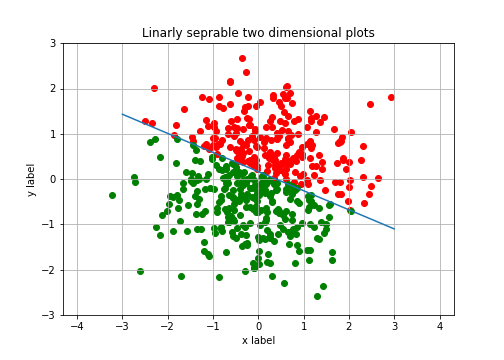

In [18]:
fig, ax = plt.subplots(figsize=(7,5))
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.axis('equal')
ax.set_title('Linarly seprable two dimensional plots')

ax.scatter(X[T==0, 1], X[T==0, 2], c='red')
ax.scatter(X[T==1, 1], X[T==1, 2], c='green')

# Hyperplace (X-b)V = 0 -> x1V1 + x2V2 - bV2 = 0
x = np.linspace(-3,3,100)
y = -(V[1] / V[2]) * x - (V[0] / V[2])
ax.plot(x, y)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.grid()

# Training

<IPython.core.display.Javascript object>


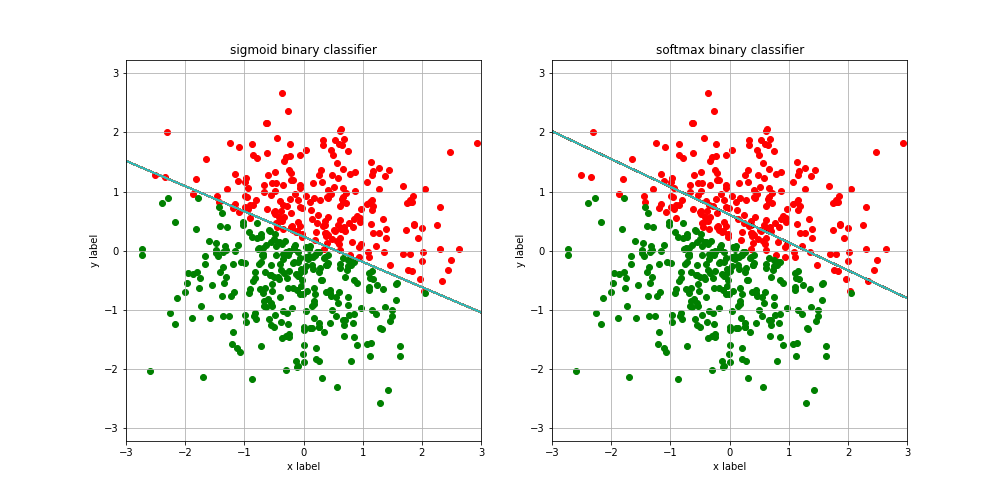

Text(0.5, 1.0, 'softmax binary classifier')

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
for i in range(2):
    ax[i].scatter(X[T==0, 1], X[T==0, 2], c='red')
    ax[i].scatter(X[T==1, 1], X[T==1, 2], c='green')
    ax[i].set_xlabel('x label')
    ax[i].set_ylabel('y label')
    ax[i].axis('equal')
    ax[i].set_xlim(-3, 3)
    ax[i].set_ylim(-3, 3)
    ax[i].grid()

ax[0].set_title("sigmoid binary classifier")
ax[1].set_title("softmax binary classifier")

## Sigmoid classifier

In [20]:
print(f"Train a sigmoid classifier to find optimal W {tuple(V)} for the boundary.")
MAX_TEST_TIMES = 100

M = 1
W = weights.he(M, D)
optimizer = SGD(lr=0.1)
draw = partial(draw_training, X=X, _ax=ax[0])
ax[0].set_xlim(-3, 3)
ax[0].set_ylim(-3, 3)

train_binary_classifier(
    N=N,
    D=D,
    M=M,
    X=X,
    T=T,
    W=W,
    log_loss_function=sigmoid_cross_entropy_log_loss,
    optimizer=optimizer,
    num_epochs=MAX_TEST_TIMES,
    callback=draw
)

Train a sigmoid classifier to find optimal W (0.15113020639043284, -0.3840863922477003, -0.9108442808771051) for the boundary.
0.7042717820797975
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[0]. Loss is [0.7042717820797975]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.7899975  -0.36564931  0.01366808]]
0.6886739498391088
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[1]. Loss is [0.6886739498391088]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.77739407 -0.37299432 -0.02239688]]
0.6737108078783821
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[2]. Loss is [0.6737108078783821]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.76510465 -0.38014079 -0.05774159]]
0.659363435609038
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[3]. Loss is [0.659363435609038]
INFO:network.test_020_binary_classifier:W after

INFO:network.test_020_binary_classifier:W after is 
[[ 0.51733924 -0.54301019 -0.88778977]]
0.4108292409486382
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[35]. Loss is [0.4108292409486382]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.51308451 -0.54691646 -0.90688608]]
0.40688424928587963
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[36]. Loss is [0.40688424928587963]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.50897756 -0.55078366 -0.92569544]]
0.4030618718576878
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[37]. Loss is [0.4030618718576878]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.50501382 -0.55461335 -0.94422607]]
0.3993565450902646
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[38]. Loss is [0.3993565450902646]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.50118885 -0.55840

0.3207288370731257
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[70]. Loss is [0.3207288370731257]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.43172514 -0.66635307 -1.43923875]]
0.31907579039324796
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[71]. Loss is [0.31907579039324796]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.43072981 -0.66941595 -1.45159712]]
0.3174541197506055
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[72]. Loss is [0.3174541197506055]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.42978414 -0.67246422 -1.46383838]]
0.3158628445314748
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[73]. Loss is [0.3158628445314748]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.42888673 -0.67549811 -1.47596494]]
0.31430102480236827
INFO:network.test_020_binary_classifier:network.test_0

In [21]:
%lprun \
    -T train_sigmoid_classifier.log \
    -f train_binary_classifier \
    train_binary_classifier(\
        N=N,D=D,M=M,X=X,T=T,W=W,\
        log_loss_function=sigmoid_cross_entropy_log_loss, \
        optimizer=optimizer, \
        num_epochs=MAX_TEST_TIMES \
    )

print(open('train_sigmoid_classifier.log', 'r').read())

0.2816865089012653
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[0]. Loss is [0.2816865089012653]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.4187952  -0.75264427 -1.76718634]]
0.28067068168974046
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[1]. Loss is [0.28067068168974046]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.41882335 -0.75534428 -1.77684838]]
0.2796686305370828
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[2]. Loss is [0.2796686305370828]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.41887327 -0.75803417 -1.7864428 ]]
0.2786800358180739
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[3]. Loss is [0.2786800358180739]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.41894439 -0.76071402 -1.79597069]]
0.2777045881591713
INFO:network.test_020_binary_classifier:network.test_020_bi

0.25266668969316225
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[35]. Loss is [0.25266668969316225]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.42967928 -0.84164791 -2.07105607]]
0.25199340907694223
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[36]. Loss is [0.25199340907694223]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.43021119 -0.84403921 -2.07885896]]
0.2513268880555682
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[37]. Loss is [0.2513268880555682]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.43075174 -0.84642282 -2.08662071]]
0.2506670090755003
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[38]. Loss is [0.2506670090755003]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.43130071 -0.8487988  -2.09434183]]
0.25001365747279747
INFO:network.test_020_binary_classifier:network.test

INFO:network.test_020_binary_classifier:W after is 
[[ 0.45220232 -0.92108922 -2.32258883]]
0.23198943072899986
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[71]. Loss is [0.23198943072899986]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.45293153 -0.92323955 -2.32920363]]
0.23150177648595344
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[72]. Loss is [0.23150177648595344]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.45366396 -0.92538375 -2.33579073]]
0.23101797961025997
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[73]. Loss is [0.23101797961025997]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.45439951 -0.92752184 -2.3423504 ]]
0.2305379872179687
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[74]. Loss is [0.2305379872179687]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.4551381  -0.9

## softmax classifier
Two class classification with softmax activation.

In [22]:
print(f"Train a softmax classifier to find optimal W {tuple(V)} for the boundary.")
MAX_TEST_TIMES = 200

M = 2                      
W = weights.he(M, D)
optimizer = SGD(lr=0.1)
draw = partial(draw_training, X=X, _ax=ax[1])
ax[1].set_xlim(-3, 3)
ax[1].set_ylim(-3, 3)

train_binary_classifier(
    N=N,
    D=D,
    M=M,
    X=X,
    T=T,
    W=W,
    log_loss_function=softmax_cross_entropy_log_loss,
    optimizer=optimizer,
    num_epochs=MAX_TEST_TIMES,
    callback=draw
)

Train a softmax classifier to find optimal W (0.15113020639043284, -0.3840863922477003, -0.9108442808771051) for the boundary.
1.0361875548762929
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[0]. Loss is [1.0361875548762929]
INFO:network.test_020_binary_classifier:W after is 
[[-0.05224247 -0.02990827 -0.79190902]
 [ 0.56922962 -0.36949843 -0.05811459]]
0.9819742585169168
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[1]. Loss is [0.9819742585169168]
INFO:network.test_020_binary_classifier:W after is 
[[-0.04405953 -0.02174501 -0.74238353]
 [ 0.56104668 -0.37766169 -0.10764008]]
0.9311478209347954
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[2]. Loss is [0.9311478209347954]
INFO:network.test_020_binary_classifier:W after is 
[[-0.03601701 -0.01410941 -0.69448148]
 [ 0.55300416 -0.38529729 -0.15554213]]
0.8836828054146053
INFO:network.test_020_binary_classifier:network

INFO:network.test_020_binary_classifier:W after is 
[[ 0.07382476  0.09842919  0.08452467]
 [ 0.4431624  -0.49783589 -0.93454828]]
0.3815739614486606
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[30]. Loss is [0.3815739614486606]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.07475272  0.1014584   0.1014825 ]
 [ 0.44223443 -0.5008651  -0.95150611]]
0.37570535819182316
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[31]. Loss is [0.37570535819182316]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.07556089  0.10446639  0.11799485]
 [ 0.44142626 -0.50387309 -0.96801846]]
0.3701352906129737
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[32]. Loss is [0.3701352906129737]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.07625689  0.10745421  0.13408496]
 [ 0.44073026 -0.50686091 -0.98410857]]
0.36484057200827896
INFO:network.test_020_binary_classifi

0.27973089380086824
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[60]. Loss is [0.27973089380086824]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.06972731  0.18445287  0.47240275]
 [ 0.44725984 -0.58385957 -1.32242636]]
0.2777851484061841
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[61]. Loss is [0.2777851484061841]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.0689953   0.18698542  0.48181363]
 [ 0.44799185 -0.58639213 -1.33183724]]
0.27588884634466004
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[62]. Loss is [0.27588884634466004]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.0682468   0.18950379  0.49109895]
 [ 0.44874035 -0.58891049 -1.34112256]]
0.2740398814432027
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[63]. Loss is [0.2740398814432027]
INFO:network.test_020_binary_classifier:W after

INFO:network.test_020_binary_classifier:W after is 
[[ 0.04364395  0.25462637  0.71194965]
 [ 0.4733432  -0.65403307 -1.56197326]]
0.2357046239990715
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[91]. Loss is [0.2357046239990715]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.04270745  0.25677385  0.71875229]
 [ 0.4742797  -0.65618055 -1.5687759 ]]
0.2346746001988106
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[92]. Loss is [0.2346746001988106]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.0417702   0.25891004  0.7254962 ]
 [ 0.47521695 -0.65831674 -1.57551981]]
0.23366129187811538
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[93]. Loss is [0.23366129187811538]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.04083241  0.26103505  0.7321826 ]
 [ 0.47615474 -0.66044175 -1.58220621]]
0.2326642366392296
INFO:network.test_020_binary_classifie

0.21058778961841845
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[121]. Loss is [0.21058778961841845]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.01491834  0.31638206  0.89998701]
 [ 0.50206881 -0.71578876 -1.75001062]]
0.20991236170275682
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[122]. Loss is [0.20991236170275682]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.0140185   0.3182235   0.90539991]
 [ 0.50296865 -0.71763021 -1.75542352]]
0.20924503033402111
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[123]. Loss is [0.20924503033402111]
INFO:network.test_020_binary_classifier:W after is 
[[ 0.013121    0.32005647  0.91077912]
 [ 0.50386615 -0.71946317 -1.76080273]]
0.20858562918866164
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[124]. Loss is [0.20858562918866164]
INFO:network.test_020_binary_classifier

0.19328196402087297
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[151]. Loss is [0.19328196402087297]
INFO:network.test_020_binary_classifier:W after is 
[[-0.010971    0.36823044  1.04951942]
 [ 0.52795816 -0.76763714 -1.89954303]]
0.1927926384709375
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[152]. Loss is [0.1927926384709375]
INFO:network.test_020_binary_classifier:W after is 
[[-0.01179293  0.36984816  1.05410454]
 [ 0.52878009 -0.76925486 -1.90412815]]
0.19230795804986117
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[153]. Loss is [0.19230795804986117]
INFO:network.test_020_binary_classifier:W after is 
[[-0.01261219  0.37145941  1.05866731]
 [ 0.52959934 -0.77086611 -1.90869092]]
0.19182784687110221
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[154]. Loss is [0.19182784687110221]
INFO:network.test_020_binary_classifier:W

INFO:network.test_020_binary_classifier:W after is 
[[-0.03449249  0.41415653  1.17832791]
 [ 0.55147964 -0.81356323 -2.02835152]]
0.17997909161440237
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[182]. Loss is [0.17997909161440237]
INFO:network.test_020_binary_classifier:W after is 
[[-0.03523741  0.41560199  1.18234257]
 [ 0.55222457 -0.81500869 -2.03236618]]
0.17960496697197811
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[183]. Loss is [0.17960496697197811]
INFO:network.test_020_binary_classifier:W after is 
[[-0.03597992  0.41704241  1.18634119]
 [ 0.55296707 -0.81644911 -2.0363648 ]]
0.1792337621711805
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[184]. Loss is [0.1792337621711805]
INFO:network.test_020_binary_classifier:W after is 
[[-0.03672003  0.41847782  1.19032393]
 [ 0.55370718 -0.81788452 -2.04034754]]
0.17886543784443257
INFO:network.test_020_binary_cla

In [23]:
%lprun \
    -T train_softmax_classifier.log \
    -f train_binary_classifier \
    train_binary_classifier(\
        N=N,D=D,M=M,X=X,T=T,W=W,\
        log_loss_function=softmax_cross_entropy_log_loss, \
        optimizer=optimizer, \
        num_epochs=MAX_TEST_TIMES \
    )

print(open('train_softmax_classifier.log', 'r').read())

0.17366160348214157
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[0]. Loss is [0.17366160348214157]
INFO:network.test_020_binary_classifier:W after is 
[[-0.04824473  0.44079515  1.25200979]
 [ 0.56523188 -0.84020185 -2.10203339]]
0.1733345719789587
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[1]. Loss is [0.1733345719789587]
INFO:network.test_020_binary_classifier:W after is 
[[-0.04894581  0.44215124  1.25574481]
 [ 0.56593297 -0.84155794 -2.10576842]]
0.17300985282562828
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[2]. Loss is [0.17300985282562828]
INFO:network.test_020_binary_classifier:W after is 
[[-0.04964472  0.44350298  1.25946645]
 [ 0.56663187 -0.84290968 -2.10949006]]
0.17268741772197954
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[3]. Loss is [0.17268741772197954]
INFO:network.test_020_binary_classifier:W after i

0.1647536429467535
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[30]. Loss is [0.1647536429467535]
INFO:network.test_020_binary_classifier:W after is 
[[-0.06837352  0.47970756  1.3586811 ]
 [ 0.58536067 -0.87911426 -2.20870471]]
0.1644853960355544
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[31]. Loss is [0.1644853960355544]
INFO:network.test_020_binary_classifier:W after is 
[[-0.06901405  0.48094592  1.3620605 ]
 [ 0.5860012  -0.88035262 -2.21208411]]
0.16421878798322928
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[32]. Loss is [0.16421878798322928]
INFO:network.test_020_binary_classifier:W after is 
[[-0.06965273  0.48218077  1.36542947]
 [ 0.58663988 -0.88158747 -2.21545308]]
0.16395380141244909
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[33]. Loss is [0.16395380141244909]
INFO:network.test_020_binary_classifier:W after

INFO:network.test_020_binary_classifier:W after is 
[[-0.08682817  0.51542152  1.45583069]
 [ 0.60381532 -0.91482822 -2.3058543 ]]
0.15712937232258173
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[61]. Loss is [0.15712937232258173]
INFO:network.test_020_binary_classifier:W after is 
[[-0.08741771  0.51656401  1.45892876]
 [ 0.60440487 -0.91597071 -2.30895237]]
0.15690488076411446
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[62]. Loss is [0.15690488076411446]
INFO:network.test_020_binary_classifier:W after is 
[[-0.0880057   0.51770362  1.46201845]
 [ 0.60499286 -0.91711032 -2.31204206]]
0.1566815911804158
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[63]. Loss is [0.1566815911804158]
INFO:network.test_020_binary_classifier:W after is 
[[-0.08859215  0.51884035  1.46509981]
 [ 0.6055793  -0.91824705 -2.31512342]]
0.15645949237828047
INFO:network.test_020_binary_classi

0.15087575851428509
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[91]. Loss is [0.15087575851428509]
INFO:network.test_020_binary_classifier:W after is 
[[-0.10441907  0.54957081  1.54820927]
 [ 0.62140622 -0.94897751 -2.39823288]]
0.15068299471762345
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[92]. Loss is [0.15068299471762345]
INFO:network.test_020_binary_classifier:W after is 
[[-0.10496426  0.55063136  1.5510713 ]
 [ 0.62195141 -0.95003806 -2.40109491]]
0.15049115241663985
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[93]. Loss is [0.15049115241663985]
INFO:network.test_020_binary_classifier:W after is 
[[-0.10550814  0.5516895   1.55392645]
 [ 0.62249529 -0.9510962  -2.40395006]]
0.1503002239376252
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[94]. Loss is [0.1503002239376252]
INFO:network.test_020_binary_classifier:W aft

INFO:network.test_020_binary_classifier:W after is 
[[-0.12023232  0.58039321  1.63123624]
 [ 0.63721948 -0.97979991 -2.48125985]]
0.14529671895354374
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[122]. Loss is [0.14529671895354374]
INFO:network.test_020_binary_classifier:W after is 
[[-0.12074109  0.58138707  1.63390845]
 [ 0.63772824 -0.98079377 -2.48393206]]
0.14512932135231524
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[123]. Loss is [0.14512932135231524]
INFO:network.test_020_binary_classifier:W after is 
[[-0.12124873  0.58237888  1.63657486]
 [ 0.63823589 -0.98178558 -2.48659847]]
0.14496264403746134
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[124]. Loss is [0.14496264403746134]
INFO:network.test_020_binary_classifier:W after is 
[[-0.12175526  0.58336866  1.63923552]
 [ 0.63874242 -0.98277536 -2.48925913]]
0.14479668160357492
INFO:network.test_020_binary_c

0.14056764344649458
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[152]. Loss is [0.14056764344649458]
INFO:network.test_020_binary_classifier:W after is 
[[-0.13550751  0.61029698  1.71151433]
 [ 0.65249466 -1.00970368 -2.56153793]]
0.14041971710338605
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[153]. Loss is [0.14041971710338605]
INFO:network.test_020_binary_classifier:W after is 
[[-0.13598401  0.61123201  1.71402043]
 [ 0.65297116 -1.01063871 -2.56404404]]
0.14027237106626778
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[154]. Loss is [0.14027237106626778]
INFO:network.test_020_binary_classifier:W after is 
[[-0.13645955  0.61216529  1.7165216 ]
 [ 0.6534467  -1.01157199 -2.56654521]]
0.1401256013613541
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[155]. Loss is [0.1401256013613541]
INFO:network.test_020_binary_classifier:W

INFO:network.test_020_binary_classifier:W after is 
[[-0.14940158  0.63761736  1.78464489]
 [ 0.66638873 -1.03702406 -2.6346685 ]]
0.13623504720304402
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[183]. Loss is [0.13623504720304402]
INFO:network.test_020_binary_classifier:W after is 
[[-0.14985106  0.63850317  1.78701281]
 [ 0.66683821 -1.03790987 -2.63703642]]
0.13610342236696601
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[184]. Loss is [0.13610342236696601]
INFO:network.test_020_binary_classifier:W after is 
[[-0.1502997   0.63938746  1.78937646]
 [ 0.66728686 -1.03879416 -2.63940007]]
0.13597227067215664
INFO:network.test_020_binary_classifier:network.test_020_binary_classifier: iteration[185]. Loss is [0.13597227067215664]
INFO:network.test_020_binary_classifier:W after is 
[[-0.15074751  0.64027022  1.79173583]
 [ 0.66773466 -1.03967692 -2.64175944]]
0.13584158914798575
INFO:network.test_020_binary_c